In [2]:
pip install mne


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.3 MB/s eta 0:00:00


In [5]:
import mne
import os
import numpy as np

In [7]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample','sample_audvis_raw.fif')

raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(0,60).load_data()

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 435GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 01m47s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.7 MB, data loaded>

In [9]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

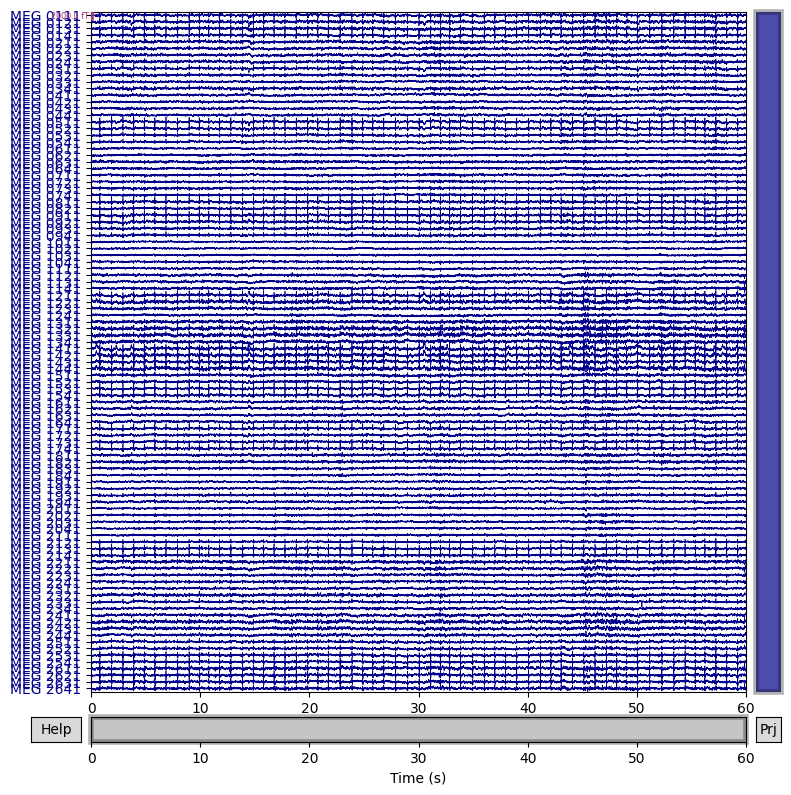

In [12]:
mag_channels = mne.pick_types(raw.info, meg ="mag")
raw.plot(duration = 60,order = mag_channels,n_channels = len(mag_channels),remove_dc = False);

# Power line noise

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


<ipython-input-16-4e2ca719ce1c>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = raw.compute_psd(tmax = np.inf,fmax = 250 ).plot();


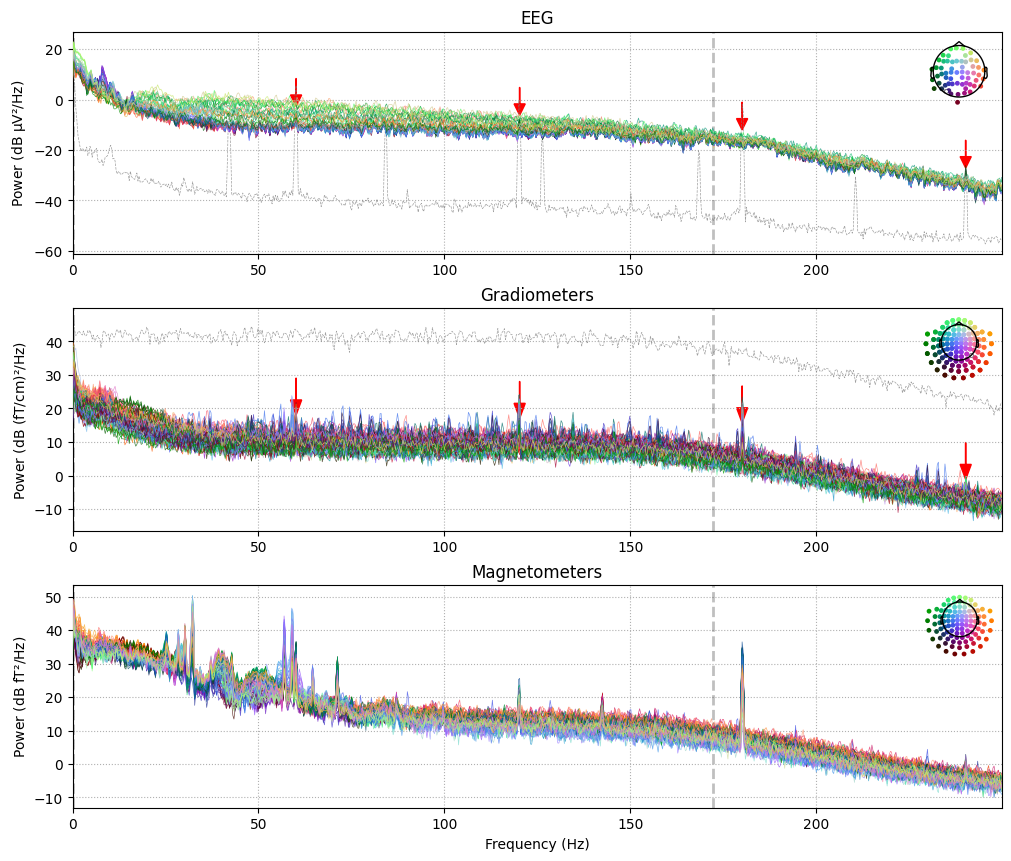

In [16]:
fig = raw.compute_psd(tmax = np.inf,fmax = 250 ).plot();

for ax in fig.axes[:2]:
  freqs = ax.lines[-1].get_xdata()
  psds = ax.lines[-1].get_ydata()
  for freq in (60,120,180,240):
    idx = np.searchsorted(freqs,freq)
    ax.arrow(x = freqs[idx],y=psds[idx]+18,dx = 0, dy=1-12,color = 'red',width = 0.1,head_width = 3,length_includes_head =True)


# Heartbeat artifacts

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 6007 samples (10.001 s)

Number of ECG events detected : 59 (average pulse 58 / min.)
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
Using data from preloaded Raw for 59 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
59 matching events found
No baseline correction applied
0 

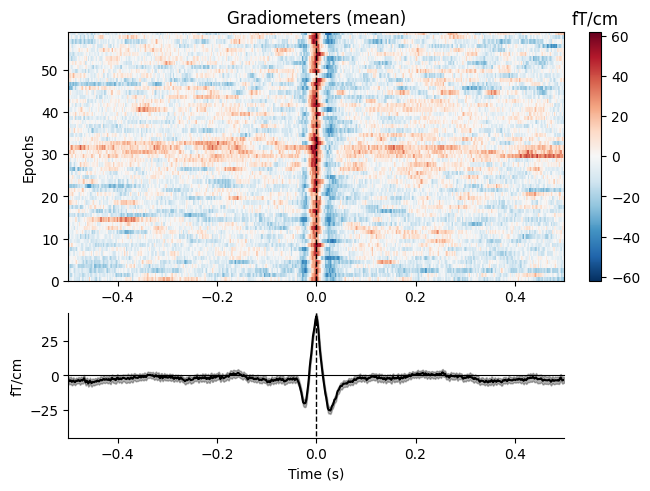

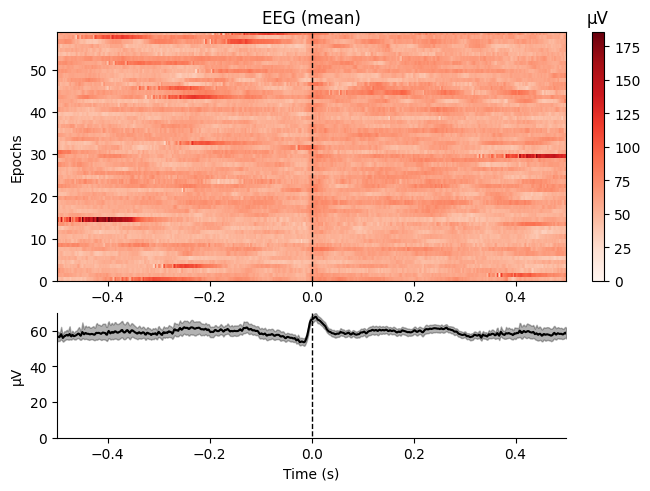

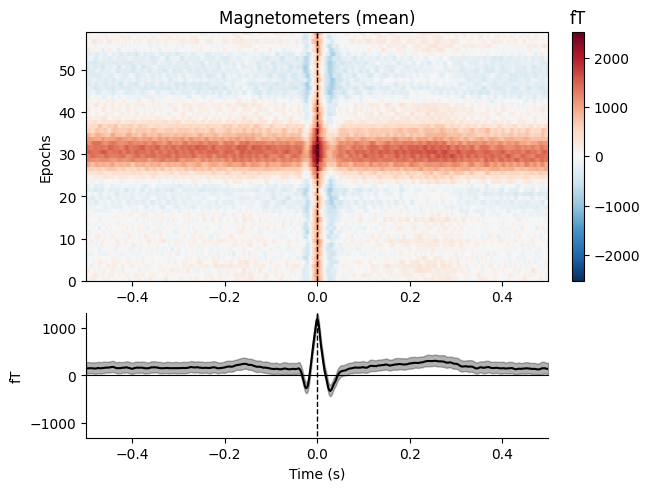

[<Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>]

In [18]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine= 'mean')

In [21]:
avg_ecg_epochs = ecg_epochs.average()

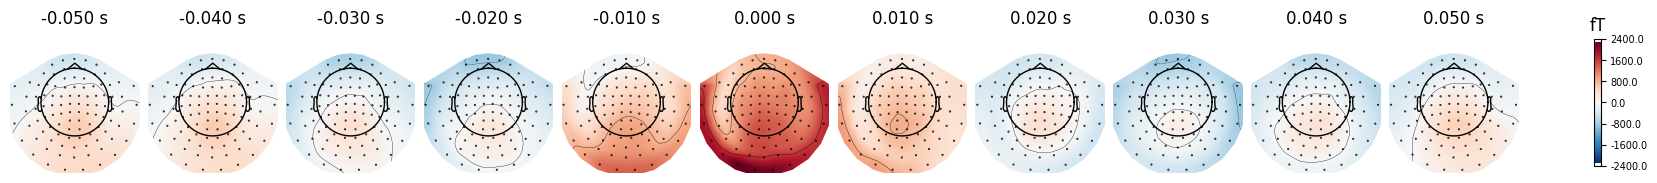

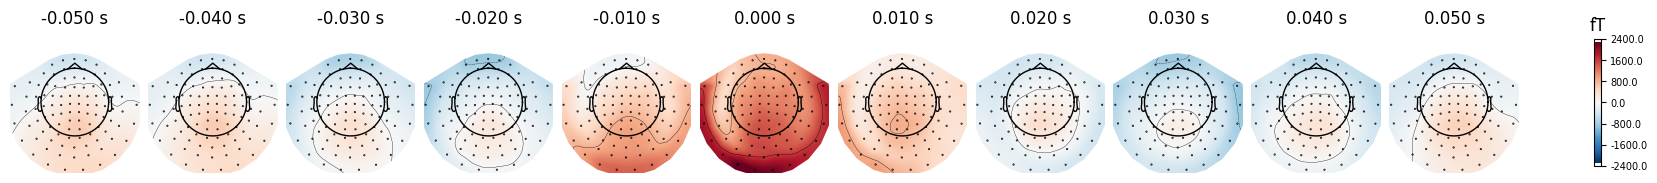

In [22]:
avg_ecg_epochs.plot_topomap(times = np.linspace(-0.05,0.05,11))

Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...


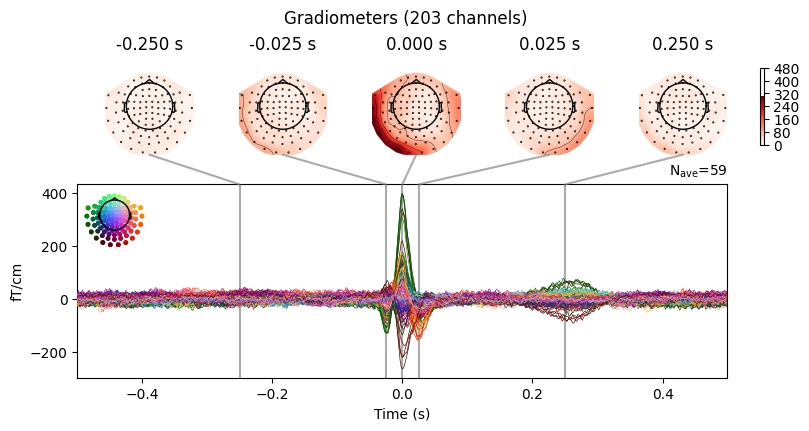

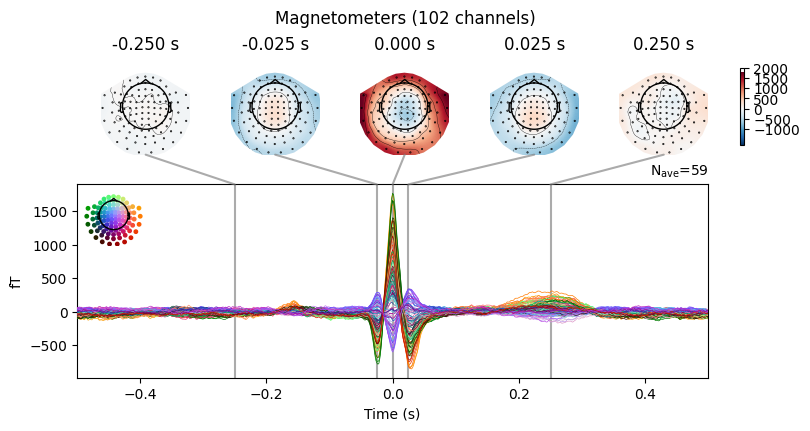

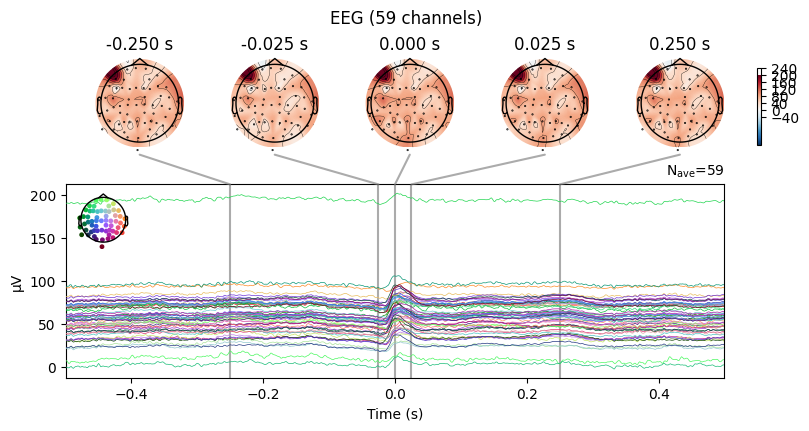

In [24]:
avg_ecg_epochs.plot_joint(times=[-0.25,-0.025,0,0.025,0.25]);

#Ocular Artifacts (EOG)

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel EOG 061 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 s)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
Using data from preloaded Raw for 10 events and 601 original t

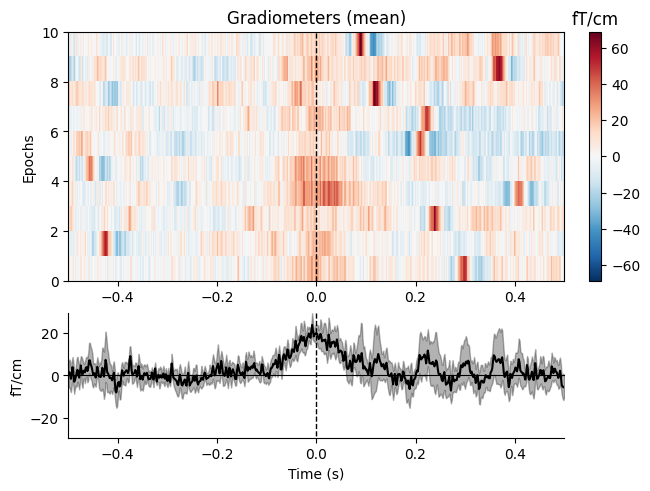

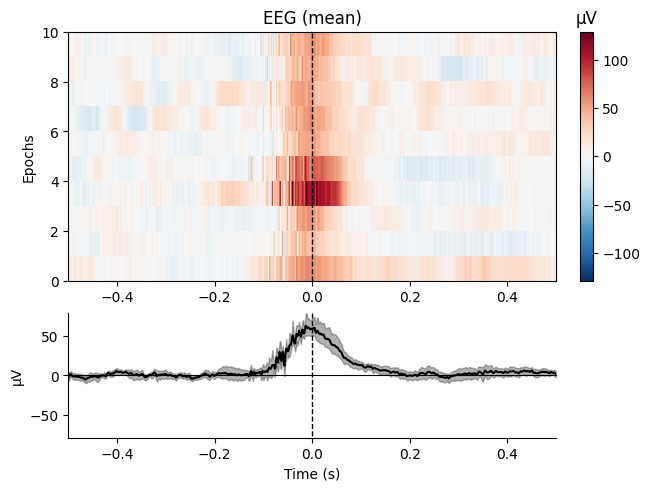

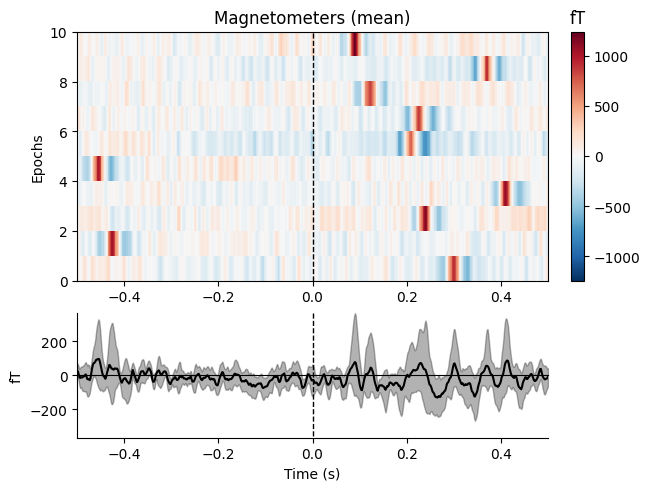

In [26]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5,-0.2))
eog_epochs.plot_image(combine="mean");


Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...


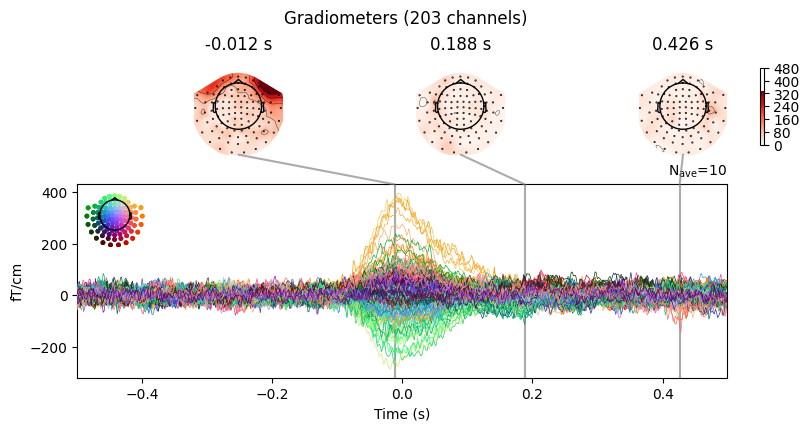

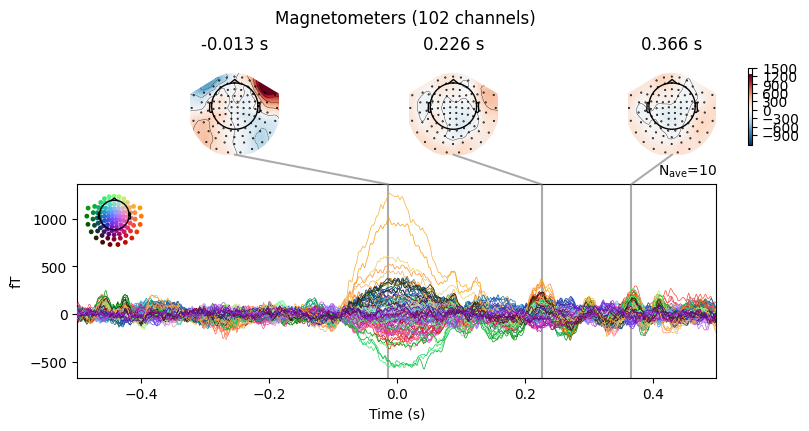

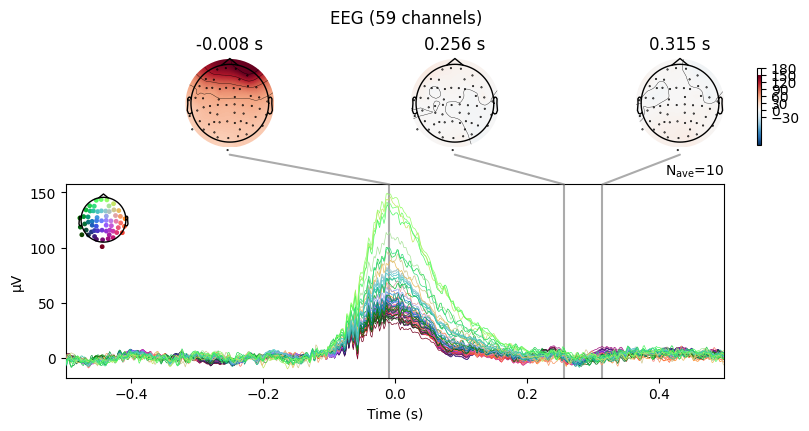

[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [27]:
eog_epochs.average().plot_joint();

In [39]:
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = os.path.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')

In [41]:
tmin, tmax = 0,20 # using the first 20s of the data
raw = mne.io.read_raw_fif(raw_fname)
raw.crop(tmin,tmax).load_data()
raw.info['bads'] = ['MEG 2443' , 'EEG 053']

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 12012  =      0.000 ...    20.000 secs...


In [43]:
selection = mne.read_vectorview_selection('Left-temporal')

picks = mne.pick_types(raw.info,meg = 'mag',eeg = False, eog = False,stim =False,
                       exclude = 'bads',selection =selection)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


<ipython-input-50-73fb141b6444>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);


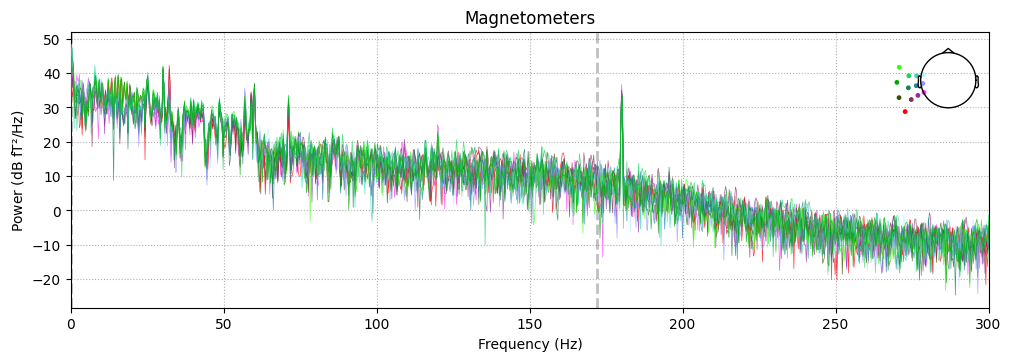

In [50]:
raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);

## Removing power line noise using notch filter

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


<ipython-input-51-87e14cea8dad>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);


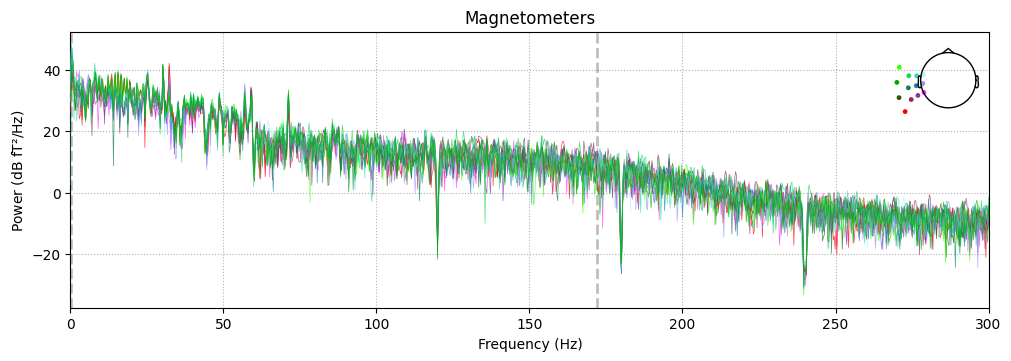

In [51]:
raw.notch_filter(np.arange(60,241,60),picks=picks,filter_length = 'auto',phase = 'zero')
raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);

## Removing pwer line noise using low pass filter

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 159 samples (0.265 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.4s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.6s
<ipython-input-52-b3ff902090bb>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);


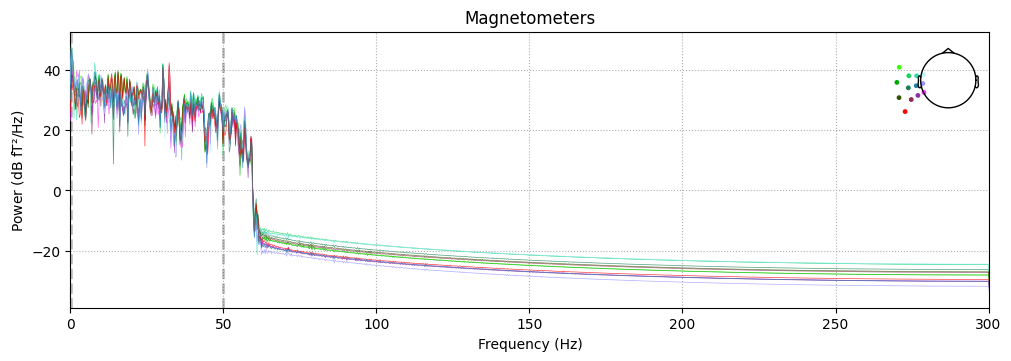

In [52]:
raw.filter(None,50.,fir_design='firwin')
raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);

## Removing the noise with high pass

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 159 samples (0.265 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)


[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.3s


Plotting power spectral density (dB=True).


<ipython-input-53-b3ff902090bb>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);


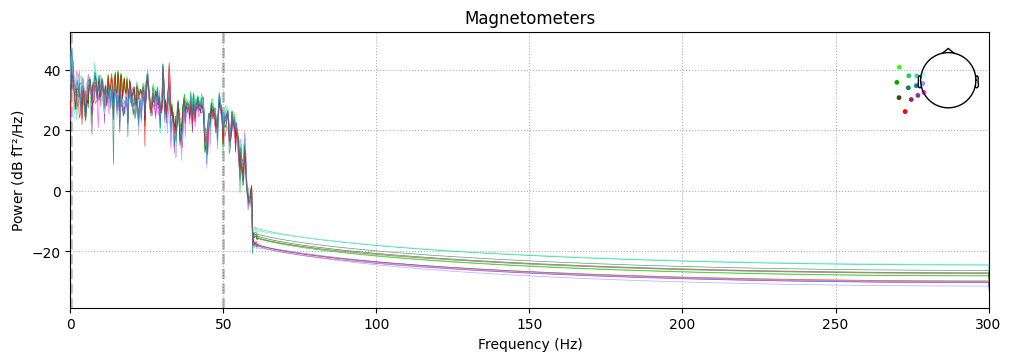

In [53]:
raw.filter(None,50.,fir_design='firwin')
raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1983 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.4s
<ipython-input-54-7b41e1f6b155>:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);


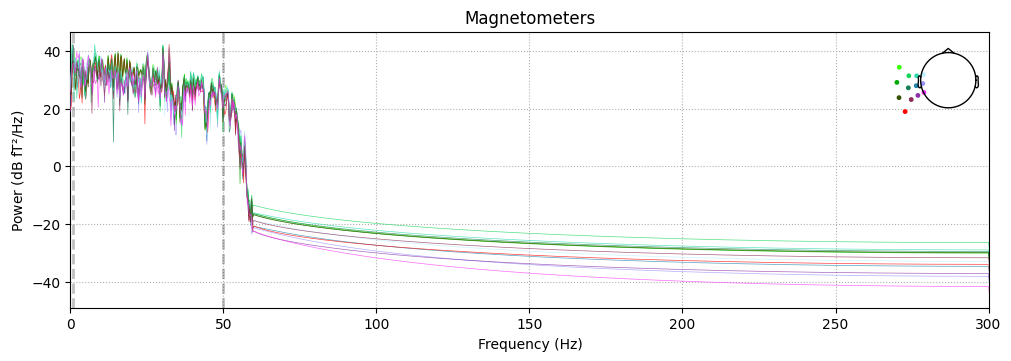

In [54]:
# You code do the low pass and high pass thing together in a band pass filter thing using this code

raw.filter(1.,50.,fir_design='firwin')
raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);

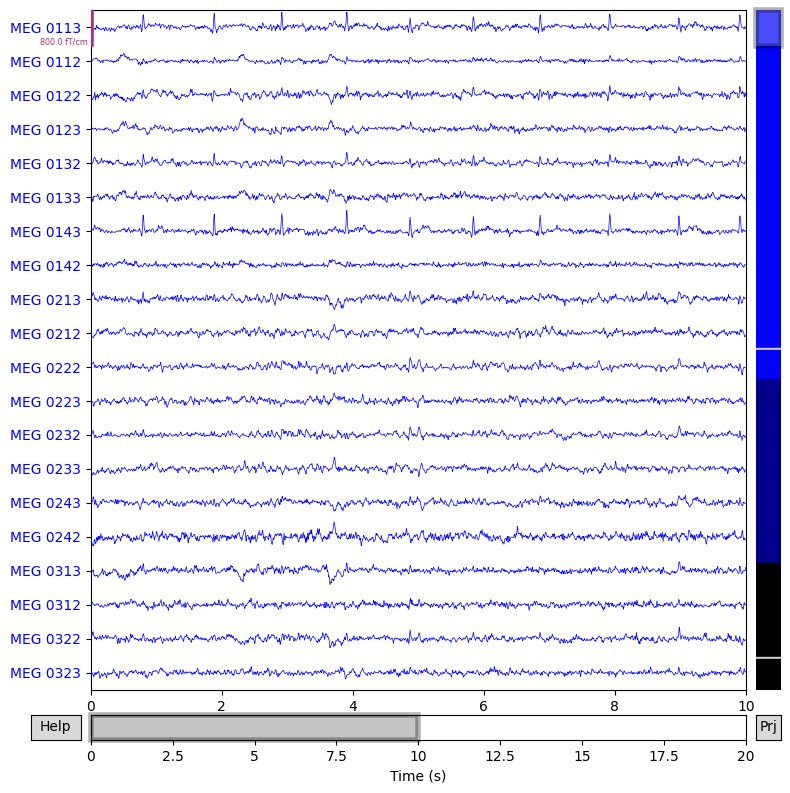

In [55]:
raw.plot();

The repeating patterns of noise in the above meg 0143 is an example of heartbeat artifact

# Downsampling and decimation

25 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
25 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.010 (s)
Plotting power spectral density (dB=True).


<ipython-input-56-d504b79b2c0f>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);


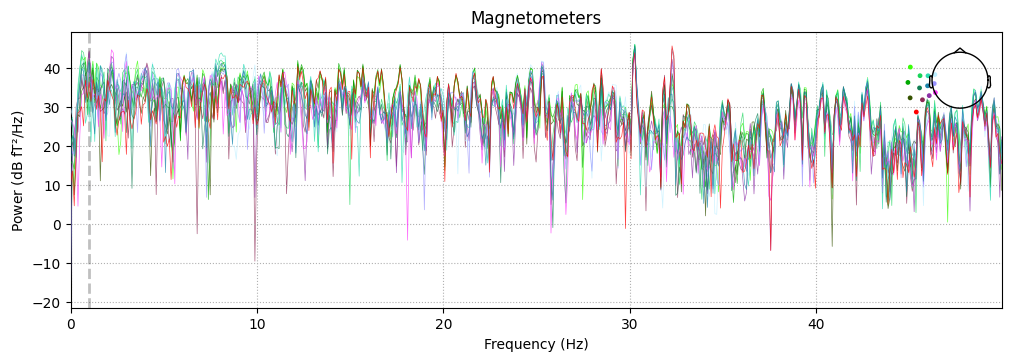

In [56]:
raw.resample(100,npad = 'auto')
raw.plot_psd(area_mode ='range',tmax=10.0,picks = picks,average = False);

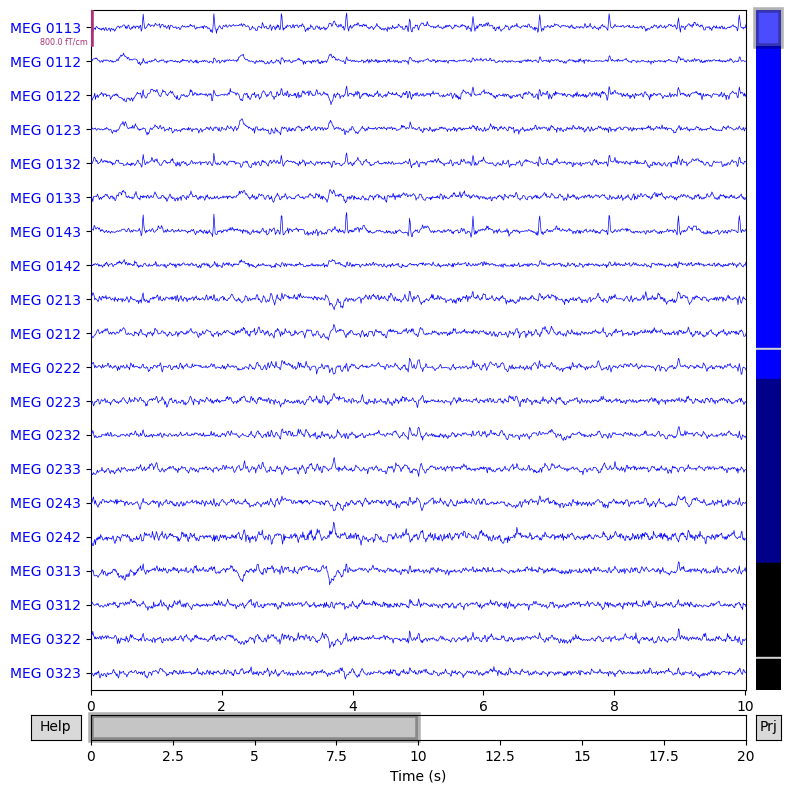

In [57]:
raw.plot();

In [58]:
raw.info['bads'] = ['MEG 2443']

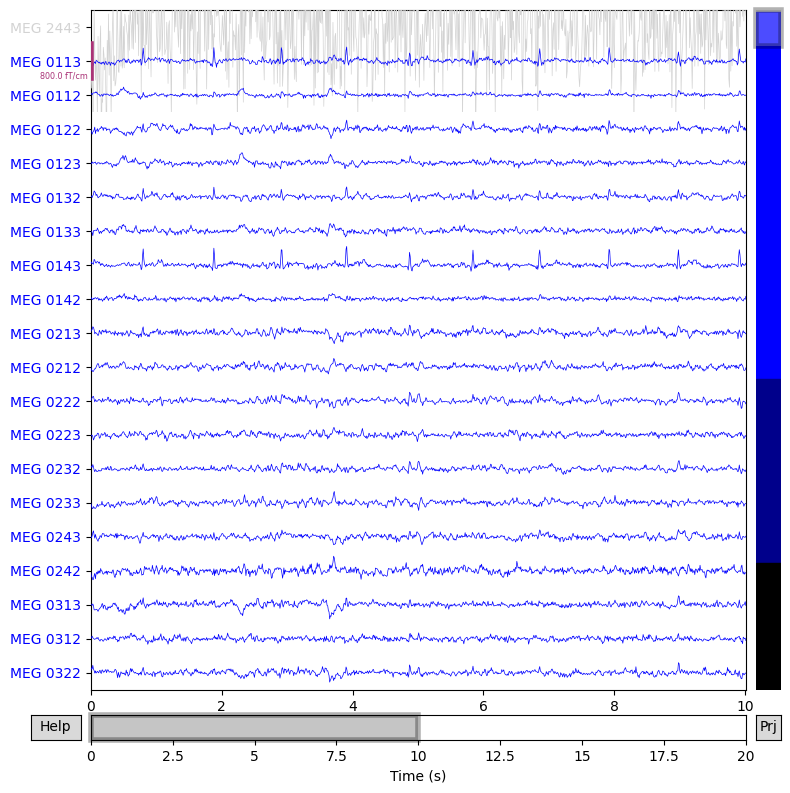

In [61]:
ch_names = raw.info['ch_names'].copy()
ch_names.remove('MEG 2443')
raw.reorder_channels(['MEG 2443']+ch_names)
raw.plot();

Reading /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


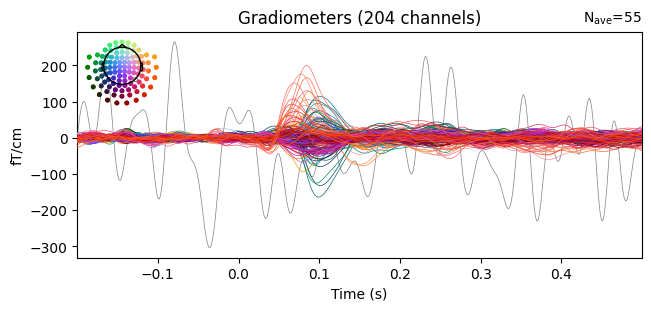

In [67]:
data_path = sample.data_path()

evoked_fname = os.path.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')

evoked = mne.read_evokeds(evoked_fname, condition='Left Auditory', baseline=(None, 0))
evoked.pick_types(meg = 'grad',eeg = False,exclude = [])
evoked.plot(exclude = [],time_unit='s');


In [68]:
evoked.interpolate_bads(reset_bads = False, verbose = False);

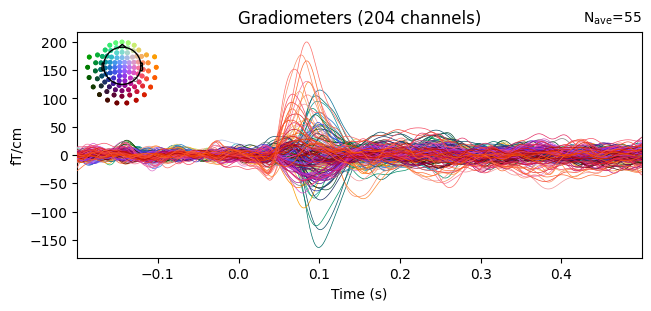

In [69]:
evoked.plot(exclude = [],time_unit='s');

# Marking bad epochs

In [70]:
reject = dict(grad = 4000e-13,mag = 4e-12,eog = 200e-6)


In [77]:
events = mne.find_events(raw,stim_channel='STI 014')
event_id = {"auditory/left" : 1}
tmin, tmax = -0.2,0.5
baseline = (None,0)
picks = mne.pick_types(raw.info, meg = True, eeg = True, eog = True, stim = False, exclude = 'bads')
epochs = mne.Epochs(raw,events,event_id,tmin,tmax,proj=True,picks=picks,baseline=baseline,reject =reject,
                    preload = True)

25 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
6 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 6 events and 71 original time points ...
0 bad epochs dropped


In [79]:
reject.update({"eog": 140e-6})
epochs.drop_bad(reject=reject)
print(epochs)


0 bad epochs dropped
<Epochs |  6 events (all good), -0.2 – 0.5 s, baseline -0.2 – 0 s, ~4.5 MB, data loaded,
 'auditory/left': 6>


# Turning rejection Thresholds

In [83]:
from ipywidgets import interact

picks = mne.pick_types(raw.info, meg = True, eeg = True)
epochs = mne.Epochs(raw,events,event_id,tmin,tmax,proj=True,picks=picks,baseline=baseline,reject = None,
                    preload = True)

def reject_epochs(reject):
  reject = dict (eeg = reject * 1e-6)
  evoked = epochs.copy().drop_bad(reject=reject,verbose = False).average()
  evoked.plot(spatial_colors=True)
  print("No. of epochs retained %d %d "% (evoked.nave,len(epochs)))

Not setting metadata
6 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 6 events and 71 original time points ...
0 bad epochs dropped


In [84]:
interact(reject_epochs,reject=(35,350,10));

interactive(children=(IntSlider(value=185, description='reject', max=350, min=35, step=10), Output()), _dom_cl…

In [86]:
!pip install autoreject
from autoreject import get_rejection_threshold
reject = get_rejection_threshold(epochs)
reject

Estimating rejection dictionary for mag
Estimating rejection dictionary for grad
Estimating rejection dictionary for eeg


{'mag': 2.556565950459545e-12,
 'grad': 7.216871018172208e-11,
 'eeg': 5.1964846993402246e-05}

In [87]:
reject

{'mag': 2.556565950459545e-12,
 'grad': 7.216871018172208e-11,
 'eeg': 5.1964846993402246e-05}

In [88]:
from autoreject import AutoReject
n_interpolates = np.array([1,2,4])
consensus = np.linspace(0.5,1.0,6)

ar = AutoReject(n_interpolates,consensus,thresh_method = 'random_search',random_state = 42)

In [91]:
raw.info['bads'] = []
picks = mne.pick_types(raw.info, meg = True, eeg = True)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=baseline, reject = None,
                    preload = True, on_missing='warn')
ar = AutoReject(n_interpolates,consensus,thresh_method = 'random_search',random_state = 42, cv=5)

ar.fit(epochs['auditory/left'])

Not setting metadata
6 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 6 events and 71 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=grad


  0%|          | Creating augmented epochs : 0/204 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/204 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=2
Running autoreject on ch_type=mag


  0%|          | Creating augmented epochs : 0/102 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/102 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=2
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/60 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/60 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Fold : 0/5 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


AutoReject(consensus=array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), cv=5,
      n_interpolate=array([1, 2, 4]), n_jobs=1, picks=None,
      random_state=42, thresh_method='random_search', verbose=True)